In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import folium
import numpy as np
import matplotlib as mpl
from folium.plugins import MarkerCluster
import json
from datetime import timedelta

In [3]:
df = pd.read_csv("./data/Waze IMR region results 20210817.csv", encoding="ISO-8859-1")

In [4]:
df.shape

(2273390, 11)

In [5]:
df.Type.value_counts()

region     2185730
in-park      87660
Name: Type, dtype: int64

In [6]:
df.Alert.value_counts()

WEATHERHAZARD    1850397
JAM               299124
ACCIDENT           70508
ROAD_CLOSED        53358
Name: Alert, dtype: int64

In [10]:
53358-19477

33881

In [12]:
df.head()

,Unnamed: 0,NAME,UNIT_TYPE,Time,Alert,Sub_Alert,Street,State,Lon,Lat,Type,ones
0,1,BRCA,National Park,2017-03-08 19:51:32,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-12,UT,-112.130970,37.683406,in-park,1
1,2,BRCA,National Park,2017-03-12 02:53:04,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-12,UT,-112.130618,37.683240,in-park,1
2,3,BRCA,National Park,2017-03-08 22:06:55,JAM,JAM_MODERATE_TRAFFIC,SR-12,UT,-112.131072,37.683454,in-park,1
3,4,BRCA,National Park,2017-03-10 02:23:50,WEATHERHAZARD,NaN,SR-12,UT,-112.138126,37.686660,in-park,1
4,5,BRCA,National Park,2017-03-23 16:06:09,JAM,JAM_MODERATE_TRAFFIC,SR-12,UT,-112.131026,37.683432,in-park,1


In [13]:
df['Time'] = pd.to_datetime(df['Time'])
df["date"] = df["Time"].dt.strftime("%m/%d/%y")
df['month_year']=df["Time"].dt.strftime("%Y-%m")
df['month_day']=df["Time"].dt.strftime("%m-%d")
df['year']=df["Time"].dt.strftime("%Y")
df['month']=df["Time"].dt.strftime("%B")
df['hour']=df["Time"]- timedelta(hours=8)
df['hour']=df["hour"].dt.strftime("%I%p")

In [14]:
df_month_grouped = df.groupby(['month_year']).count()
df_month_grouped= df_month_grouped.reset_index()
df_month_grouped = df_month_grouped[['month_year','NAME']].sort_values(by='month_year')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


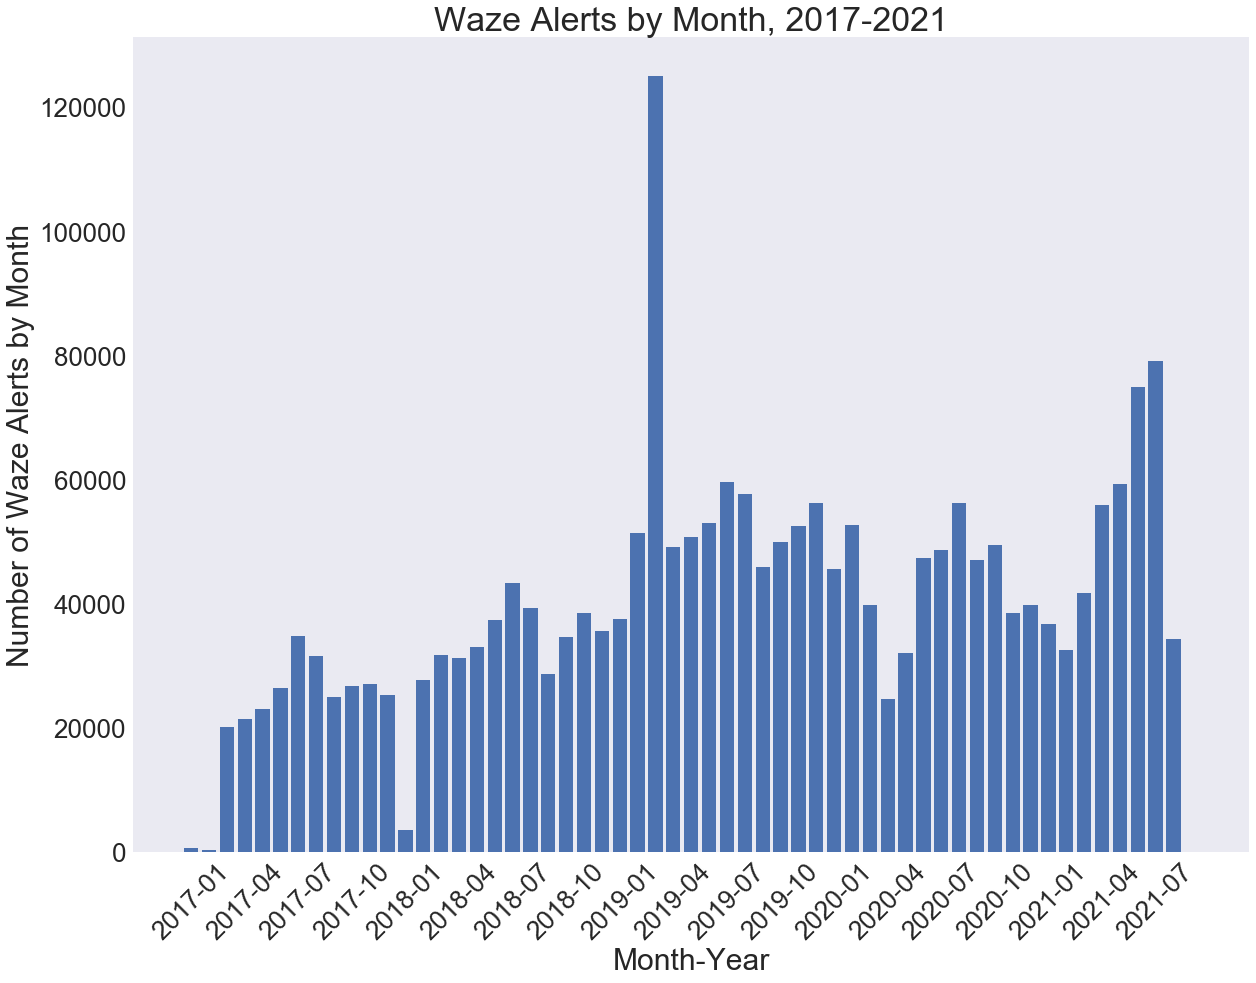

In [15]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')

tick_spacing = 3
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_month_grouped.month_year, df_month_grouped.NAME, linewidth=4)
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Waze Alerts by Month, 2017-2021',fontsize= 34) # title of plot

ax.set_xlabel('Month-Year',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=26)
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.grid('off')

plt.show()

In [16]:
df_noclosures = df.loc[df['Alert']!="ROAD_CLOSED"]
df_month_grouped_noclosures = df_noclosures.groupby(['month_year']).count()
df_month_grouped_noclosures= df_month_grouped_noclosures.reset_index()
df_month_grouped_noclosures = df_month_grouped_noclosures[['month_year','NAME']].sort_values(by='month_year')
df_month_grouped_noclosures['Total'] = df_month_grouped_noclosures['NAME']
df_month_grouped_noclosures = df_month_grouped_noclosures.drop(['NAME'], axis = 1)


In [17]:
df_noclosures = df.loc[df['Alert']!="ROAD_CLOSED"]
df_noclosures_inpark = df_noclosures.loc[df_noclosures['Type']=='in-park']
df_noclosures_inpark = df_noclosures_inpark.groupby(['month_year']).count()
df_noclosures_inpark= df_noclosures_inpark.reset_index()
df_noclosures_inpark = df_noclosures_inpark[['month_year','NAME']].sort_values(by='month_year')
df_noclosures_inpark['InPark'] = df_noclosures_inpark['NAME']
df_noclosures_inpark = df_noclosures_inpark.drop(['NAME'], axis = 1)
df_month_grouped_noclosures_v2 = pd.merge(df_month_grouped_noclosures, df_noclosures_inpark, how = "left",
                                         on = "month_year")

In [18]:
df_month_grouped_noclosures_v2 = df_month_grouped_noclosures_v2.fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


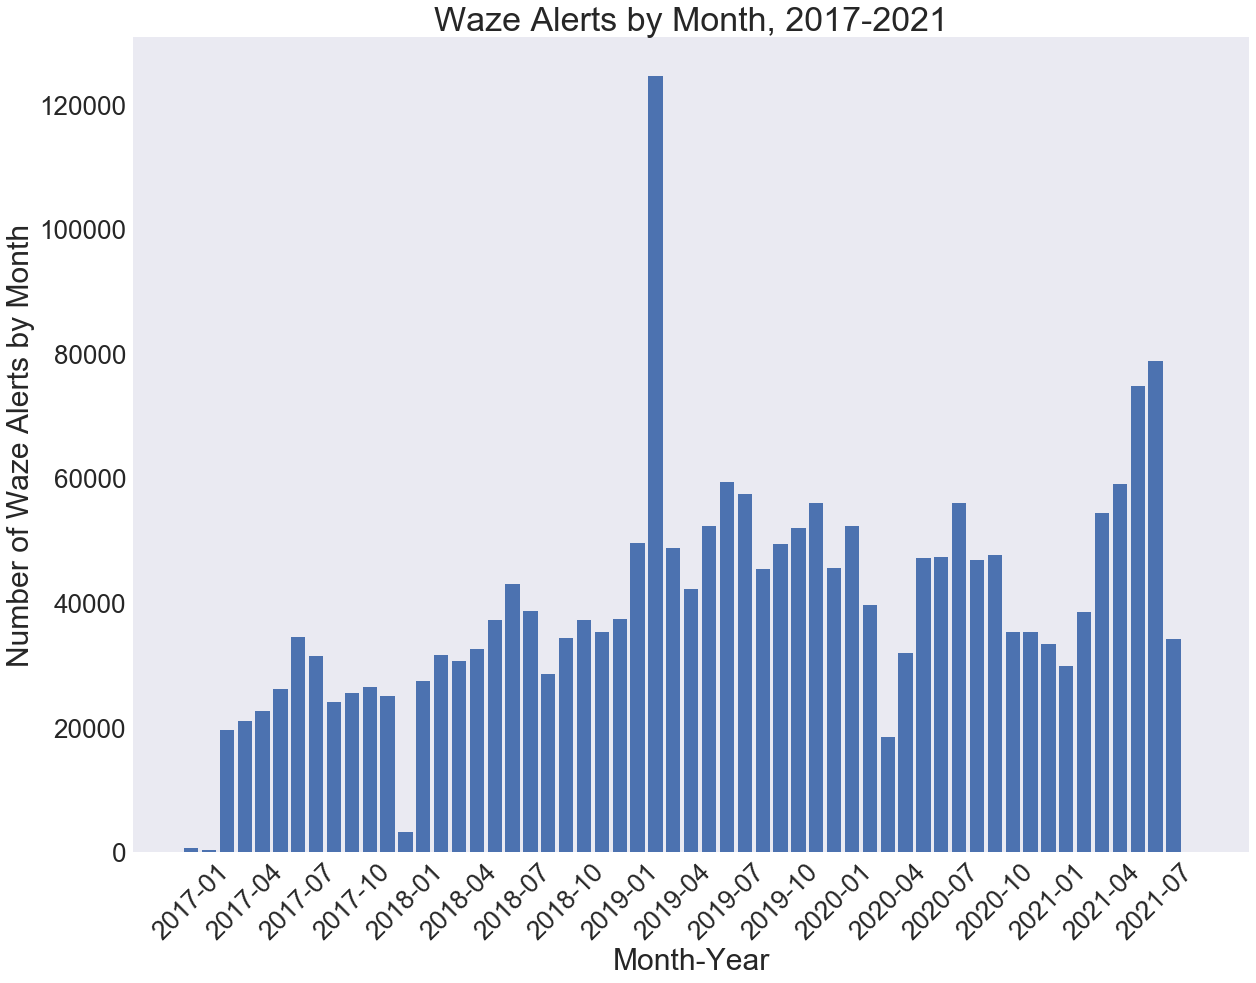

In [19]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')


tick_spacing = 3
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_month_grouped_noclosures.month_year, df_month_grouped_noclosures.Total, linewidth=4)
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Waze Alerts by Month, 2017-2021',fontsize= 34) # title of plot

ax.set_xlabel('Month-Year',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=26)
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.grid('off')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


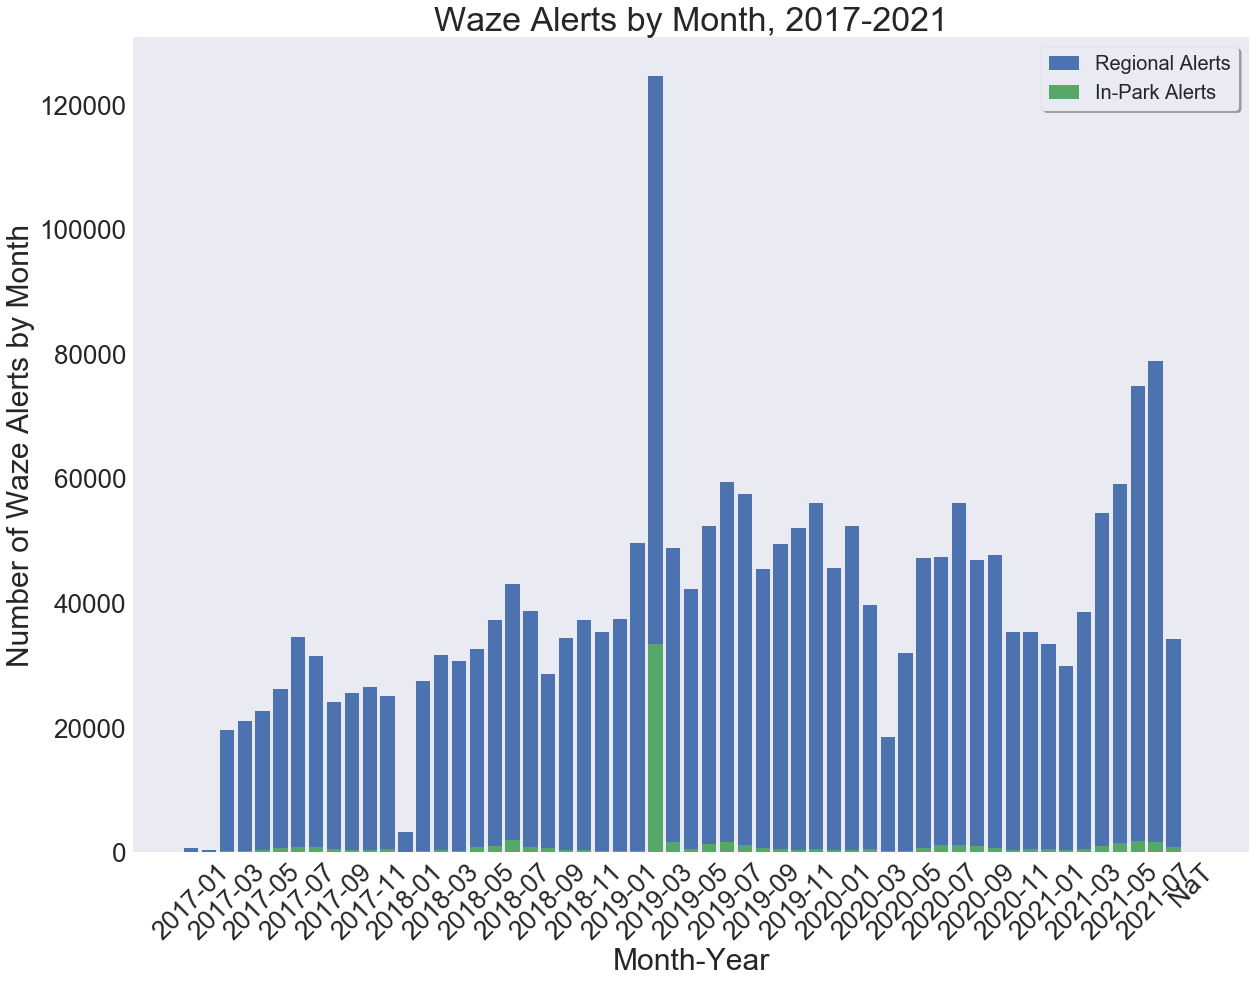

In [20]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')


tick_spacing = 2
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_month_grouped_noclosures_v2.month_year, df_month_grouped_noclosures_v2.Total, linewidth=4,
      label = "Regional Alerts")
ax.bar(df_month_grouped_noclosures_v2.month_year, df_month_grouped_noclosures_v2.InPark, linewidth=4,
      label = "In-Park Alerts")
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Waze Alerts by Month, 2017-2021',fontsize= 34) # title of plot

ax.set_xlabel('Month-Year',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=26)
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.grid('off')
ax.legend(fontsize = 20, frameon=True,fancybox = True,shadow=True, handlelength=1.5,framealpha=1, )

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


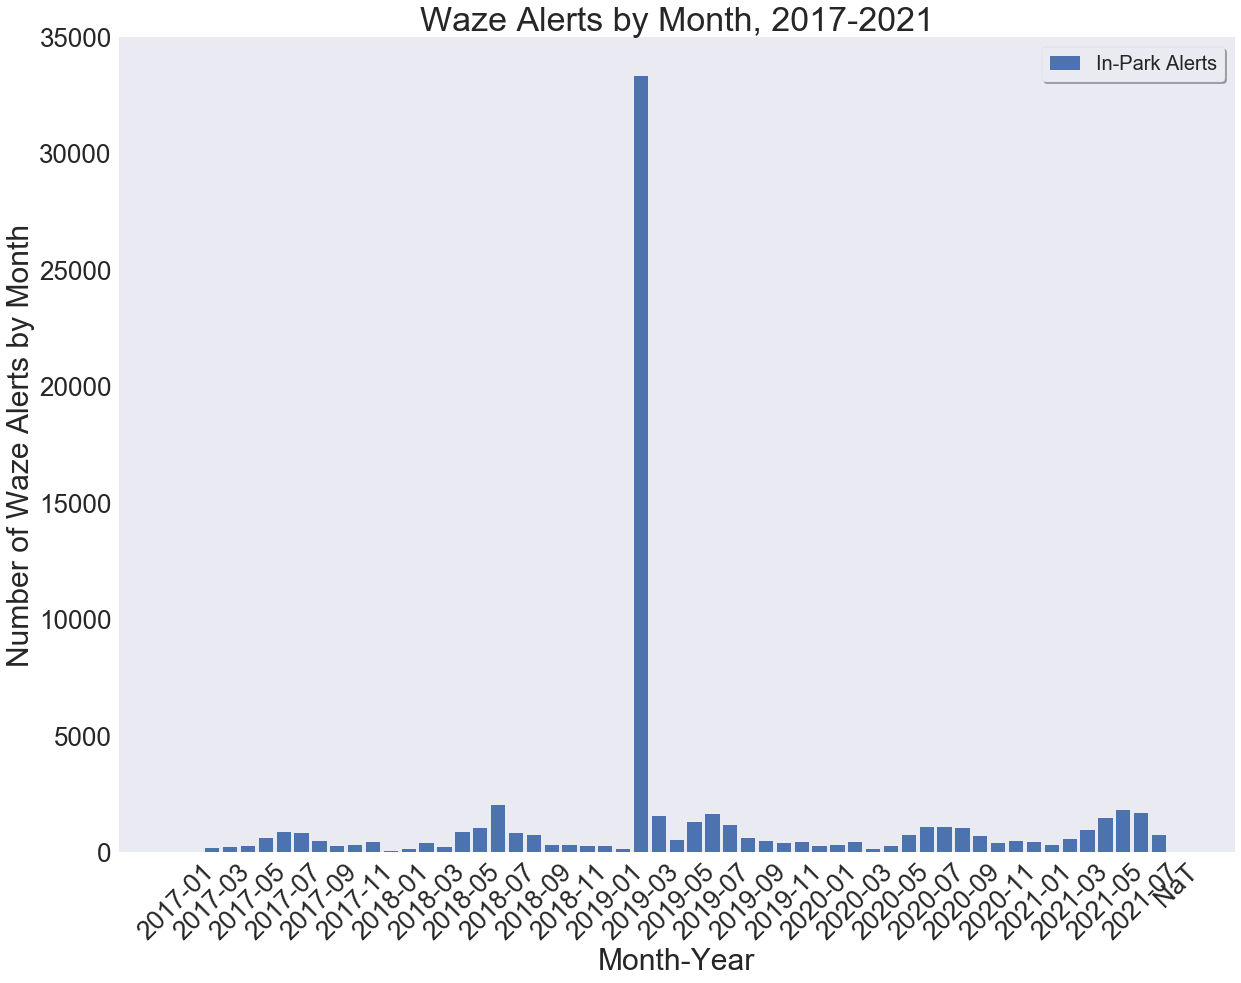

In [21]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')


tick_spacing = 2
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_month_grouped_noclosures_v2.month_year, df_month_grouped_noclosures_v2.InPark, linewidth=4,
      label = "In-Park Alerts")
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Waze Alerts by Month, 2017-2021',fontsize= 34) # title of plot

ax.set_xlabel('Month-Year',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=26, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=26)
ax.tick_params(axis='both', which='minor', labelsize=26)
ax.grid('off')
ax.legend(fontsize = 20, frameon=True,fancybox = True,shadow=True, handlelength=1.5,framealpha=1, )

plt.show()

In [22]:
df_noclosures = df.loc[df['Alert']!="ROAD_CLOSED"]
df_noclosures_inpark = df_noclosures.loc[df_noclosures['Type']=='in-park']


In [23]:
df_noclosures_inpark.head()

,Unnamed: 0,NAME,UNIT_TYPE,Time,Alert,Sub_Alert,Street,State,Lon,Lat,Type,ones,date,month_year,month_day,year,month,hour
0,1,BRCA,National Park,2017-03-08 19:51:32,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-12,UT,-112.130970,37.683406,in-park,1,03/08/17,2017-03,03-08,2017,March,11AM
1,2,BRCA,National Park,2017-03-12 02:53:04,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-12,UT,-112.130618,37.683240,in-park,1,03/12/17,2017-03,03-12,2017,March,06PM
2,3,BRCA,National Park,2017-03-08 22:06:55,JAM,JAM_MODERATE_TRAFFIC,SR-12,UT,-112.131072,37.683454,in-park,1,03/08/17,2017-03,03-08,2017,March,02PM
3,4,BRCA,National Park,2017-03-10 02:23:50,WEATHERHAZARD,NaN,SR-12,UT,-112.138126,37.686660,in-park,1,03/10/17,2017-03,03-10,2017,March,06PM
4,5,BRCA,National Park,2017-03-23 16:06:09,JAM,JAM_MODERATE_TRAFFIC,SR-12,UT,-112.131026,37.683432,in-park,1,03/23/17,2017-03,03-23,2017,March,08AM


In [24]:
sorter = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
         'October','November','December']

df_fullyear = df_noclosures_inpark.loc[df_noclosures_inpark['year'].isin(['2018', '2019', '2020'])]
df_months = df_fullyear.groupby(['month']).count()
df_months= df_months.reset_index()
df_months = df_months[['month','NAME']]

df_months.month = df_months.month.astype("category")
df_months.month.cat.set_categories(sorter, inplace=True)
df_months = df_months.sort_values('month')
df_months = df_months.reset_index()
df_months = df_months[['month','NAME']]
df_months

,month,NAME
0,January,572
1,February,589
2,March,34130
3,April,1901
4,May,1616
5,June,3059
6,July,4762
7,August,3097
8,September,2356
9,October,1445


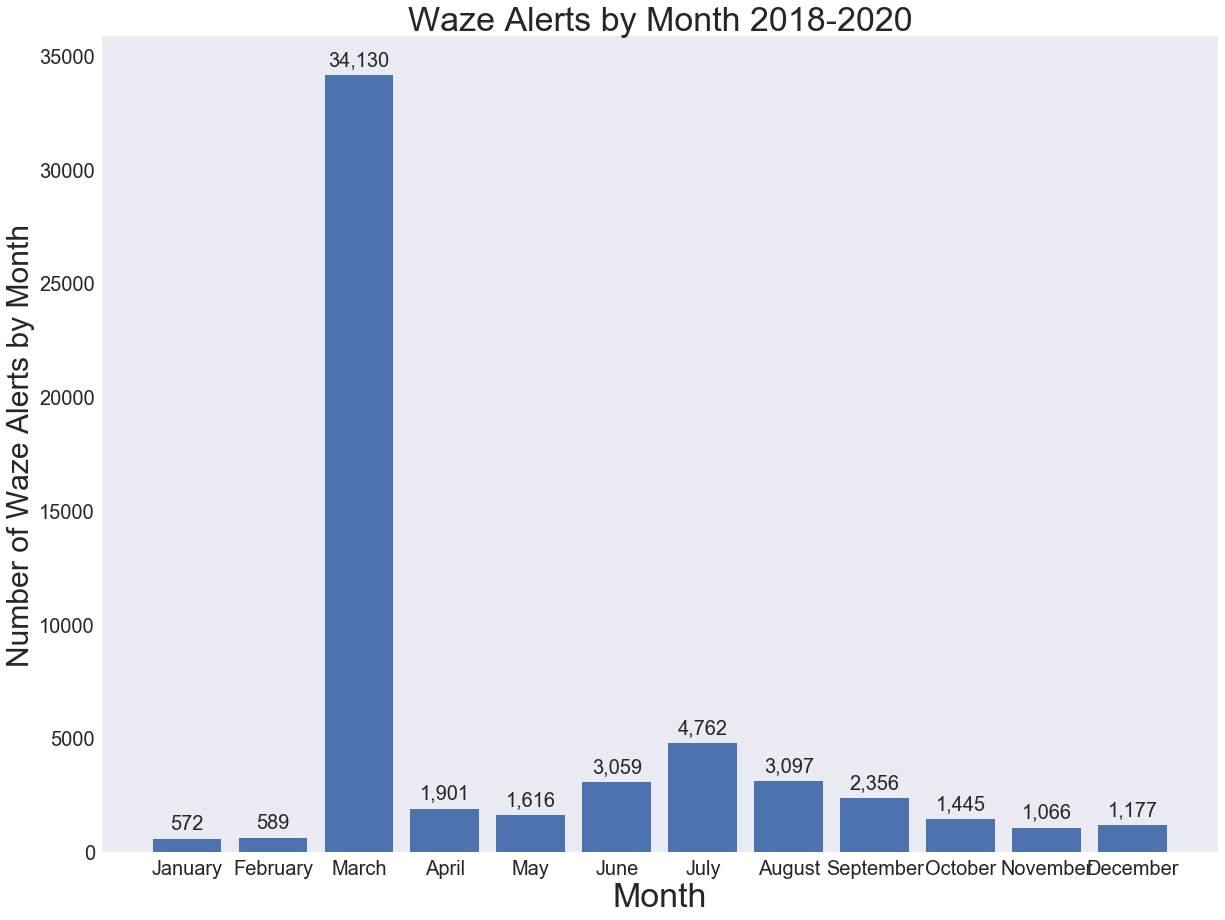

In [25]:
import matplotlib.ticker as ticker

tick_spacing = 1
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.bar(df_months.month, df_months.NAME, linewidth=4)
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Waze Alerts by Month 2018-2020',fontsize= 34) # title of plot

ax.set_xlabel('Month',fontsize = 34) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=18)

for x,y in zip(df_months.month, df_months.NAME):

    label = '{:,}'.format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 20) # horizontal alignment can be left, right or center
ax.grid('off')
plt.show()

In [26]:
df_noclosures_inpark.shape

(68183, 18)

In [27]:
df_inpark = df.loc[df['Type']=='in-park']
df_inpark.shape

(87660, 18)

In [28]:
87660-68183

19477

In [29]:
df_noclosures = df.loc[df['Alert']!="ROAD_CLOSED"]
df_noclosures_nopark = df_noclosures.loc[df_noclosures['Type']!='in-park']


In [30]:
df_noclosures.shape

(2220032, 18)

In [31]:
df.shape

(2273390, 18)

In [32]:
2273390-2220032

53358

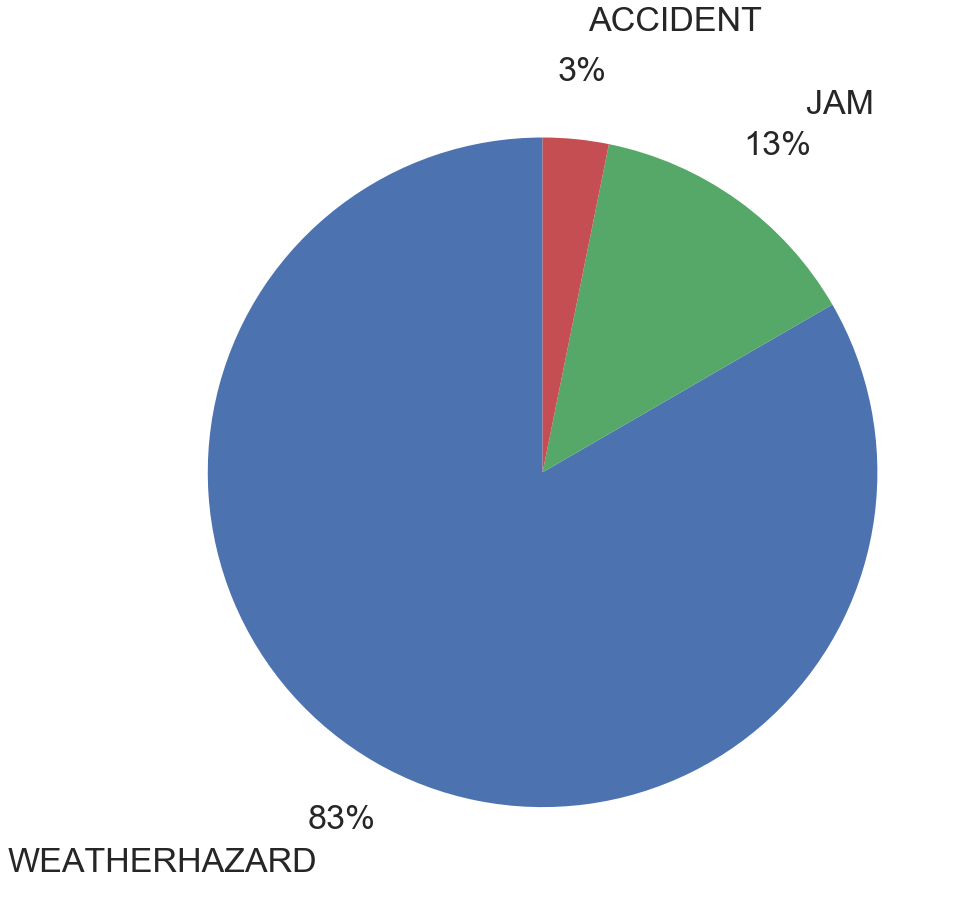

In [33]:
fig, ax = plt.subplots(1,1,figsize=(15,20))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
#ax.set_title('Waze Alerts by Alert Type 2017-2021',fontsize= 34) # title of plot
plt.pie(df_noclosures.Alert.value_counts(), labels = df_noclosures.Alert.value_counts().index,
        textprops={'fontsize': 34},autopct='%1.0f%%', pctdistance=1.2,
        labeldistance=1.35, rotatelabels=False,startangle=90)

plt.show()

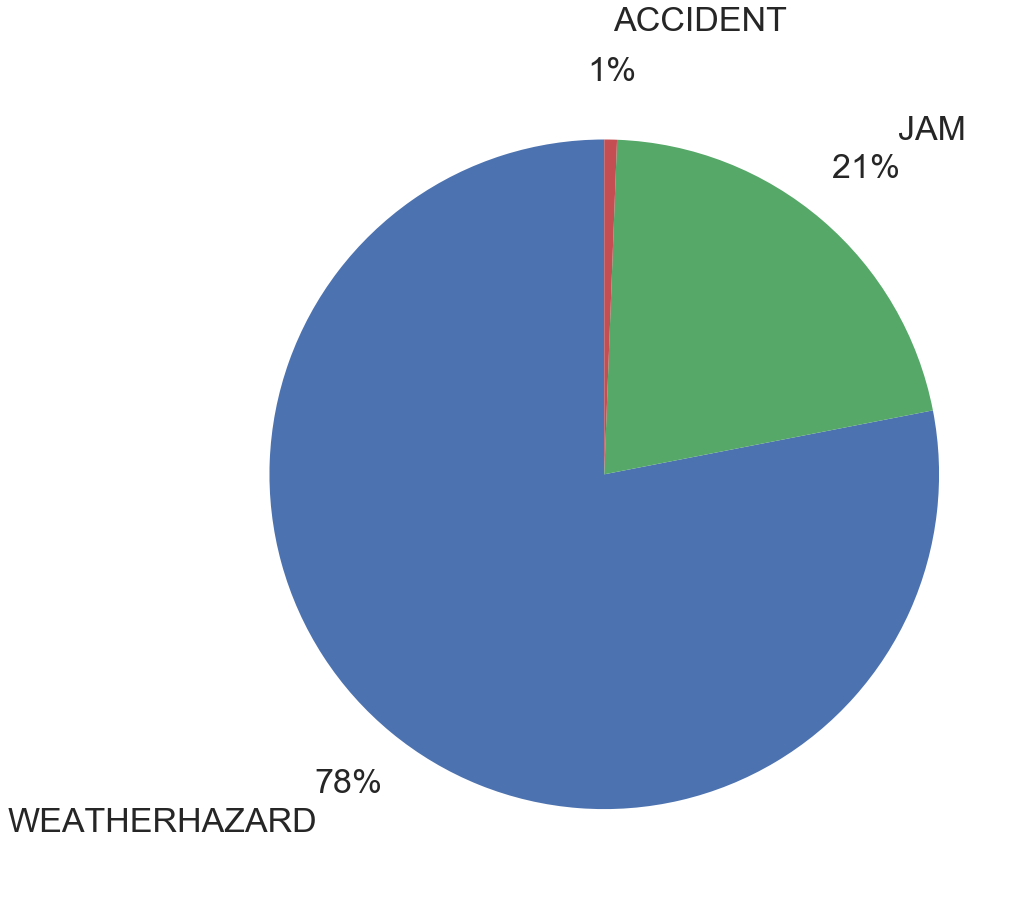

In [34]:
fig, ax = plt.subplots(1,1,figsize=(15,20))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
#ax.set_title('Waze Alerts by Alert Type 2017-2021',fontsize= 34) # title of plot
plt.pie(df_noclosures_inpark.Alert.value_counts(), labels = df_noclosures_inpark.Alert.value_counts().index,
        textprops={'fontsize': 34},autopct='%1.0f%%', pctdistance=1.2,
        labeldistance=1.35, rotatelabels=False,startangle=90)

plt.show()

In [35]:
df_noclosures_inpark.Sub_Alert.value_counts()

HAZARD_ON_SHOULDER_CAR_STOPPED        12888
JAM_STAND_STILL_TRAFFIC                6698
JAM_HEAVY_TRAFFIC                      4328
HAZARD_ON_ROAD_CONSTRUCTION            1621
JAM_MODERATE_TRAFFIC                   1482
HAZARD_ON_ROAD_OBJECT                   922
HAZARD_ON_ROAD_CAR_STOPPED              634
HAZARD_ON_SHOULDER_ANIMALS              385
HAZARD_ON_ROAD_POT_HOLE                 155
ACCIDENT_MAJOR                          129
HAZARD_ON_ROAD_ICE                      108
HAZARD_WEATHER_FOG                      101
ACCIDENT_MINOR                           76
HAZARD_ON_ROAD_ROAD_KILL                 70
HAZARD_ON_SHOULDER                       65
HAZARD_ON_SHOULDER_MISSING_SIGN          34
HAZARD_WEATHER_HEAVY_SNOW                26
HAZARD_ON_ROAD                           23
HAZARD_WEATHER_HAIL                      17
HAZARD_WEATHER                           11
HAZARD_WEATHER_FLOOD                     10
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT        8
Name: Sub_Alert, dtype: int64

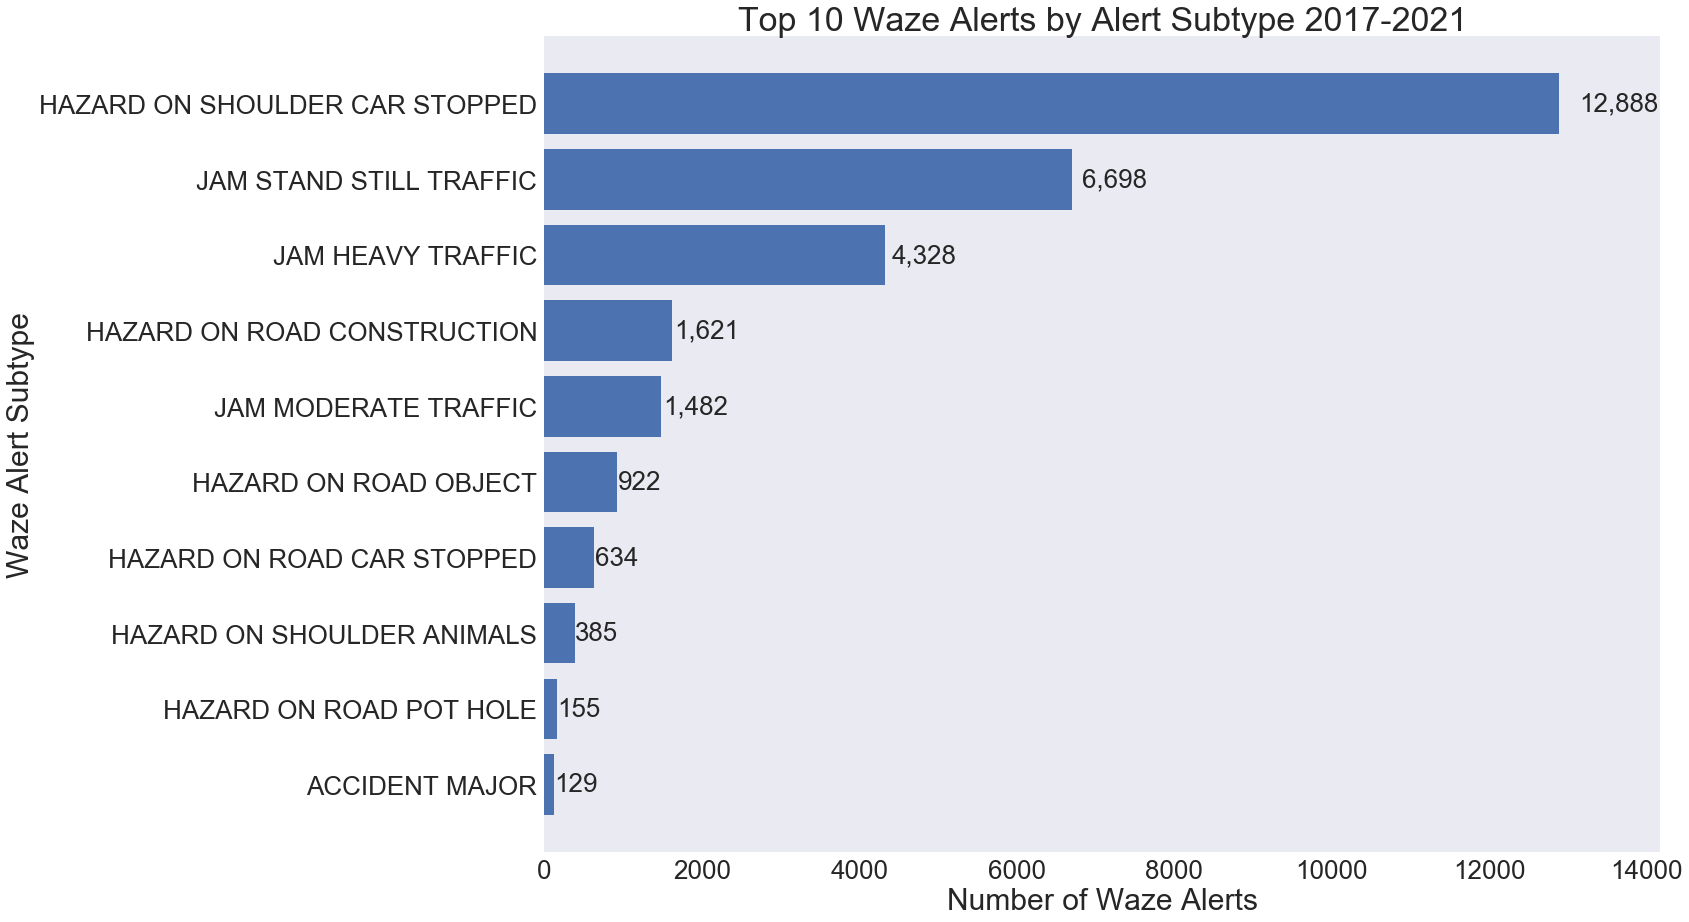

In [36]:
bar_labels = []
for x in df_noclosures_inpark.Sub_Alert.value_counts().index[:10]:
    
    label = '{:,}'.format(y)
    bar_labels.append(x.replace("_"," "))

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Top 10 Waze Alerts by Alert Subtype 2017-2021',fontsize= 34) # title of plot
bars = ax.barh(width = df_noclosures_inpark.Sub_Alert.value_counts()[:10], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Waze Alerts',fontsize = 30) #xlabel
ax.set_ylabel('Waze Alert Subtype', fontsize = 30)#ylabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)
for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

ax.grid("off")
plt.xlim([0, df_noclosures_inpark.Sub_Alert.value_counts()[0]*1.1])
plt.show()

In [37]:
df_noclosures_inpark.Sub_Alert.value_counts()

HAZARD_ON_SHOULDER_CAR_STOPPED        12888
JAM_STAND_STILL_TRAFFIC                6698
JAM_HEAVY_TRAFFIC                      4328
HAZARD_ON_ROAD_CONSTRUCTION            1621
JAM_MODERATE_TRAFFIC                   1482
HAZARD_ON_ROAD_OBJECT                   922
HAZARD_ON_ROAD_CAR_STOPPED              634
HAZARD_ON_SHOULDER_ANIMALS              385
HAZARD_ON_ROAD_POT_HOLE                 155
ACCIDENT_MAJOR                          129
HAZARD_ON_ROAD_ICE                      108
HAZARD_WEATHER_FOG                      101
ACCIDENT_MINOR                           76
HAZARD_ON_ROAD_ROAD_KILL                 70
HAZARD_ON_SHOULDER                       65
HAZARD_ON_SHOULDER_MISSING_SIGN          34
HAZARD_WEATHER_HEAVY_SNOW                26
HAZARD_ON_ROAD                           23
HAZARD_WEATHER_HAIL                      17
HAZARD_WEATHER                           11
HAZARD_WEATHER_FLOOD                     10
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT        8
Name: Sub_Alert, dtype: int64

In [38]:
months = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
     'October','November','December']

month_df_alerts = pd.DataFrame({'month':months})


for x in df_noclosures_inpark.Alert.unique():
    temp_df = df_noclosures_inpark.loc[df_noclosures_inpark['Alert']==x]
    temp_df = temp_df.loc[temp_df['year'].isin(['2018','2019', '2020'])]
    if x =='WEATHERHAZARD':
        temp_df = temp_df.loc[temp_df['Sub_Alert']=='HAZARD_ON_SHOULDER_CAR_STOPPED']
        x = "Car Stopped on Shoulder"
        temp_df_months = temp_df.groupby(['month']).count()
        temp_df_months= temp_df_months.reset_index()
        temp_df_months = temp_df_months[['month','NAME']]

        temp_df_months[x] = temp_df_months['NAME']
        temp_df_months = temp_df_months.drop(['NAME'], axis = 1)
        month_df_alerts = pd.merge(month_df_alerts, temp_df_months, how = "left")
        month_df_alerts = month_df_alerts.fillna(0)
        x ='WEATHERHAZARD'
        temp_df = df_noclosures_inpark.loc[df_noclosures_inpark['Alert']==x]
        temp_df = temp_df.loc[temp_df['Sub_Alert']!='HAZARD_ON_SHOULDER_CAR_STOPPED']
        temp_df = temp_df.loc[temp_df['year'].isin(['2018','2019', '2020'])]
        x="Other Roadway Hazard"
    
    if x == "ROAD_CLOSED":
        x = "Road Closed"
    if x == "JAM":
        x = "Traffic Jam"
    if x == "ACCIDENT":
        x =  "Crash"
    temp_df_months = temp_df.groupby(['month']).count()
    temp_df_months= temp_df_months.reset_index()
    temp_df_months = temp_df_months[['month','NAME']]

    temp_df_months[x] = temp_df_months['NAME']
    temp_df_months = temp_df_months.drop(['NAME'], axis = 1)
    month_df_alerts = pd.merge(month_df_alerts, temp_df_months, how = "left")
    month_df_alerts = month_df_alerts.fillna(0)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


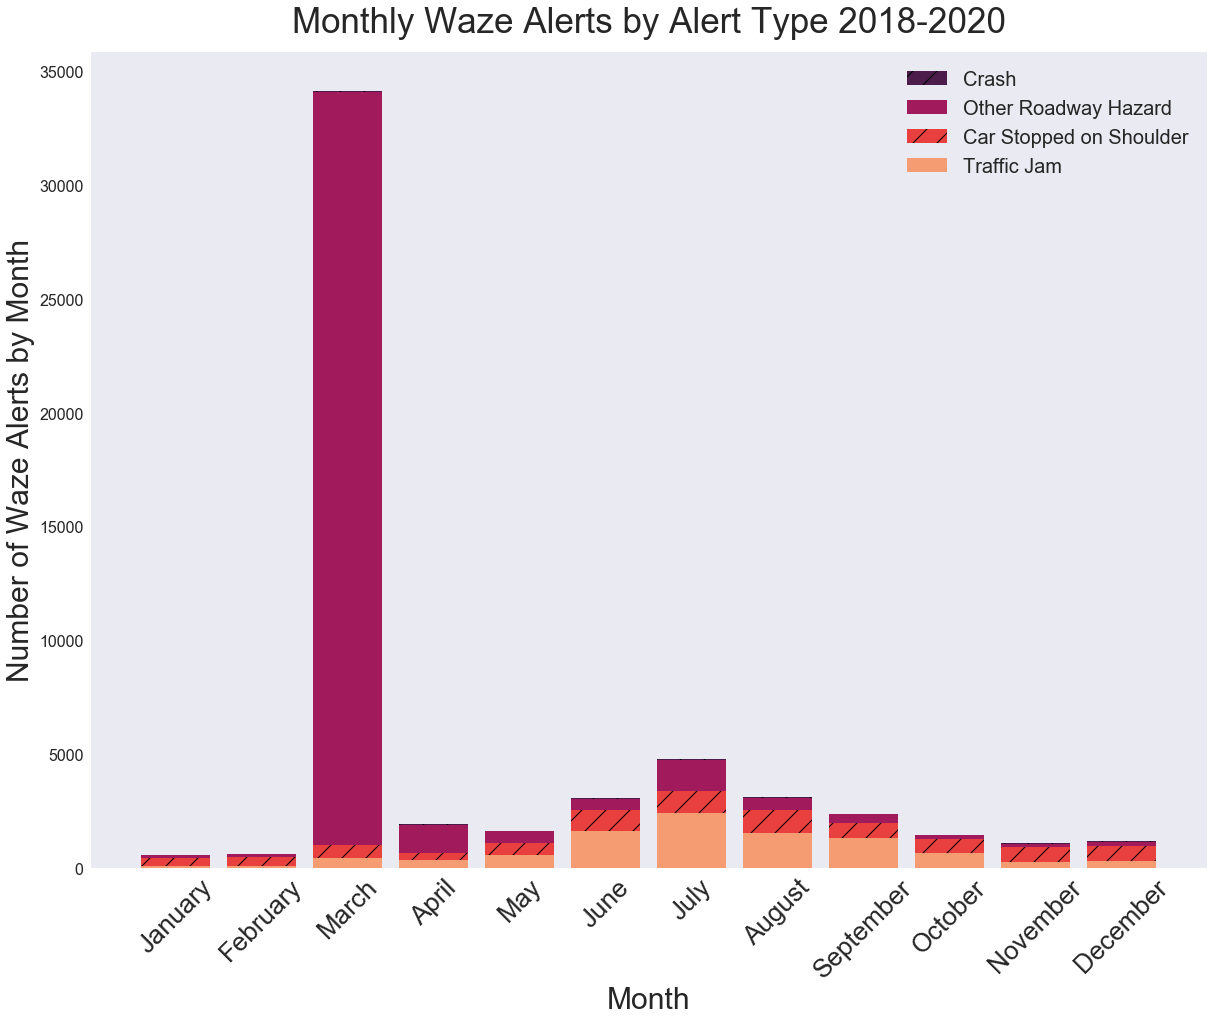

In [39]:
plt.style.use('seaborn')
import seaborn as sns
sns.set_palette("rocket", 4)
fig, ax = plt.subplots(1,1,figsize=(20,15))

ax.bar(months,
       month_df_alerts['Crash']+month_df_alerts['Traffic Jam']+month_df_alerts['Car Stopped on Shoulder']+month_df_alerts['Other Roadway Hazard'], 
       hatch = "/", label = 'Crash', linewidth=4)

ax.bar(months,
       month_df_alerts['Traffic Jam']+month_df_alerts['Car Stopped on Shoulder']+month_df_alerts['Other Roadway Hazard'], 
       label = 'Other Roadway Hazard', linewidth=4)
ax.bar(months,
       month_df_alerts['Traffic Jam']+month_df_alerts['Car Stopped on Shoulder'], 
       hatch = "/", label = 'Car Stopped on Shoulder', linewidth=4)
ax.bar(months,
       month_df_alerts['Traffic Jam'], 
       label = 'Traffic Jam', linewidth=4)

ax.set_title('Monthly Waze Alerts by Alert Type 2018-2020',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Month',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.tick_params(axis='x', which='major', labelsize=26, rotation = 45)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
plt.legend(fontsize = 20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


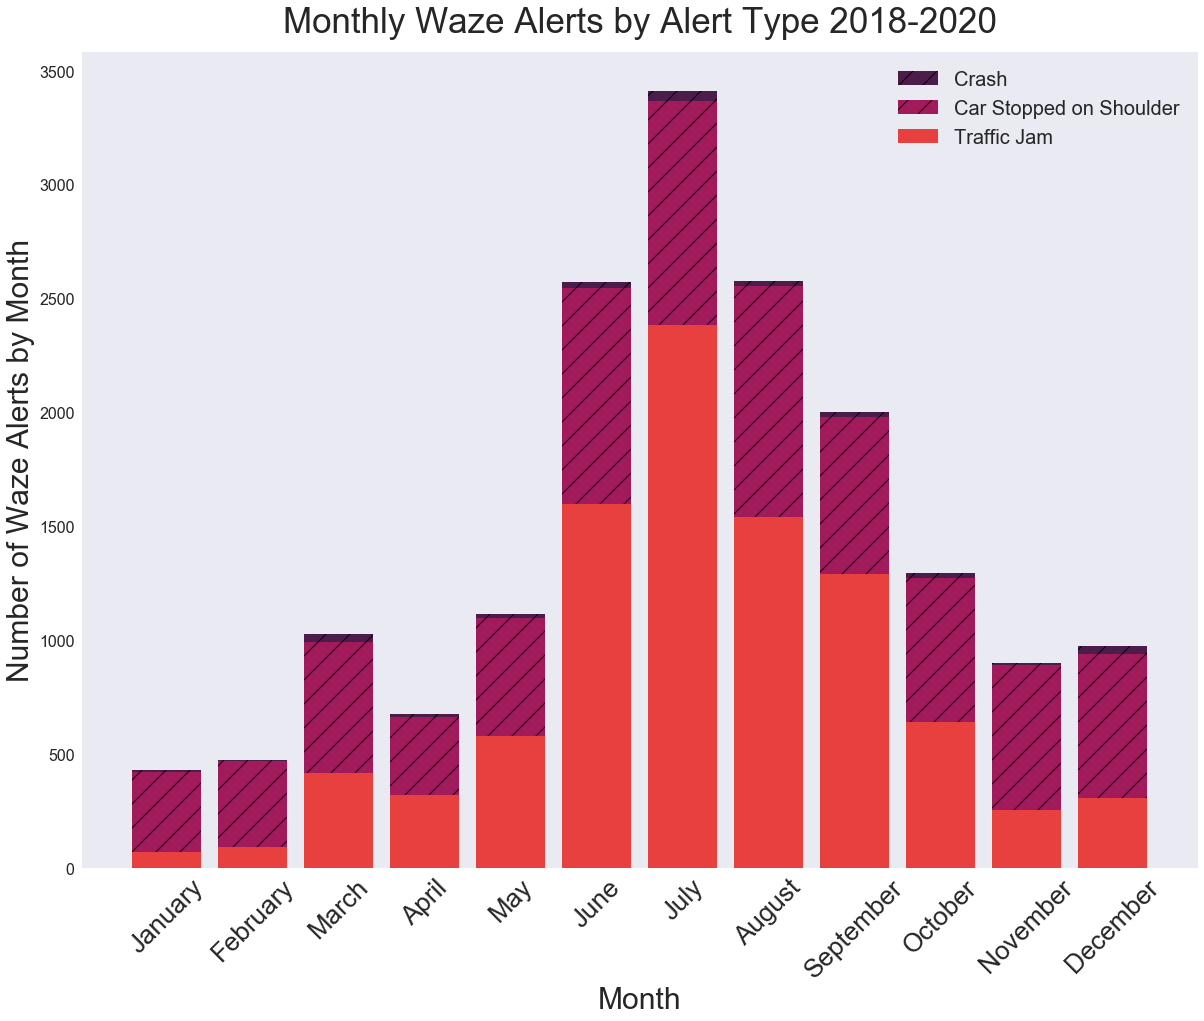

In [40]:
plt.style.use('seaborn')
import seaborn as sns
sns.set_palette("rocket", 4)
fig, ax = plt.subplots(1,1,figsize=(20,15))

ax.bar(months,
       month_df_alerts['Crash']+month_df_alerts['Traffic Jam']+month_df_alerts['Car Stopped on Shoulder'], 
       hatch = "/", label = 'Crash', linewidth=4)

ax.bar(months,
       month_df_alerts['Traffic Jam']+month_df_alerts['Car Stopped on Shoulder'], 
       hatch = "/", label = 'Car Stopped on Shoulder', linewidth=4)
ax.bar(months,
       month_df_alerts['Traffic Jam'], 
       label = 'Traffic Jam', linewidth=4)

ax.set_title('Monthly Waze Alerts by Alert Type 2018-2020',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Month',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.tick_params(axis='x', which='major', labelsize=26, rotation = 45)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
plt.legend(fontsize = 20)
plt.show()

In [41]:
df_noclosures_inpark.Sub_Alert.value_counts()

HAZARD_ON_SHOULDER_CAR_STOPPED        12888
JAM_STAND_STILL_TRAFFIC                6698
JAM_HEAVY_TRAFFIC                      4328
HAZARD_ON_ROAD_CONSTRUCTION            1621
JAM_MODERATE_TRAFFIC                   1482
HAZARD_ON_ROAD_OBJECT                   922
HAZARD_ON_ROAD_CAR_STOPPED              634
HAZARD_ON_SHOULDER_ANIMALS              385
HAZARD_ON_ROAD_POT_HOLE                 155
ACCIDENT_MAJOR                          129
HAZARD_ON_ROAD_ICE                      108
HAZARD_WEATHER_FOG                      101
ACCIDENT_MINOR                           76
HAZARD_ON_ROAD_ROAD_KILL                 70
HAZARD_ON_SHOULDER                       65
HAZARD_ON_SHOULDER_MISSING_SIGN          34
HAZARD_WEATHER_HEAVY_SNOW                26
HAZARD_ON_ROAD                           23
HAZARD_WEATHER_HAIL                      17
HAZARD_WEATHER                           11
HAZARD_WEATHER_FLOOD                     10
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT        8
Name: Sub_Alert, dtype: int64

In [42]:
months = ['January', 'February', 'March', 'April', 'May','June','July','August','September',
     'October','November','December']

month_df_alerts = pd.DataFrame({'month':months})


for x in df_noclosures_inpark.Alert.unique():
    temp_df = df_noclosures_inpark.loc[df_noclosures_inpark['Alert']==x]
    temp_df = temp_df.loc[temp_df['year'].isin(['2018','2019', '2020'])]
    if x =='WEATHERHAZARD':
        continue    
    if x == "ROAD_CLOSED":
        continue
    if x == "JAM":
        continue
    if x == "ACCIDENT":
        temp_df = temp_df.loc[temp_df['Sub_Alert']=='ACCIDENT_MAJOR']
        x = "Major Crash"
        temp_df_months = temp_df.groupby(['month']).count()
        temp_df_months= temp_df_months.reset_index()
        temp_df_months = temp_df_months[['month','NAME']]

        temp_df_months[x] = temp_df_months['NAME']
        temp_df_months = temp_df_months.drop(['NAME'], axis = 1)
        month_df_alerts = pd.merge(month_df_alerts, temp_df_months, how = "left")
        month_df_alerts = month_df_alerts.fillna(0)
        x ='ACCIDENT'
        temp_df = df_noclosures_inpark.loc[df_noclosures_inpark['Alert']==x]
        temp_df = temp_df.loc[temp_df['Sub_Alert']!='ACCIDENT_MINOR']
        temp_df = temp_df.loc[temp_df['year'].isin(['2018','2019', '2020'])]
        x="Minor Crash"

    temp_df_months = temp_df.groupby(['month']).count()
    temp_df_months= temp_df_months.reset_index()
    temp_df_months = temp_df_months[['month','NAME']]

    temp_df_months[x] = temp_df_months['NAME']
    temp_df_months = temp_df_months.drop(['NAME'], axis = 1)
    month_df_alerts = pd.merge(month_df_alerts, temp_df_months, how = "left")
    month_df_alerts = month_df_alerts.fillna(0)


In [43]:
month_df_alerts

,month,Major Crash,Minor Crash,nan
0,January,1.0,3,0.0
1,February,3.0,5,0.0
2,March,15.0,32,0.0
3,April,3.0,11,0.0
4,May,8.0,18,0.0
5,June,2.0,17,0.0
6,July,18.0,38,0.0
7,August,5.0,21,0.0
8,September,3.0,15,0.0
9,October,5.0,16,0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


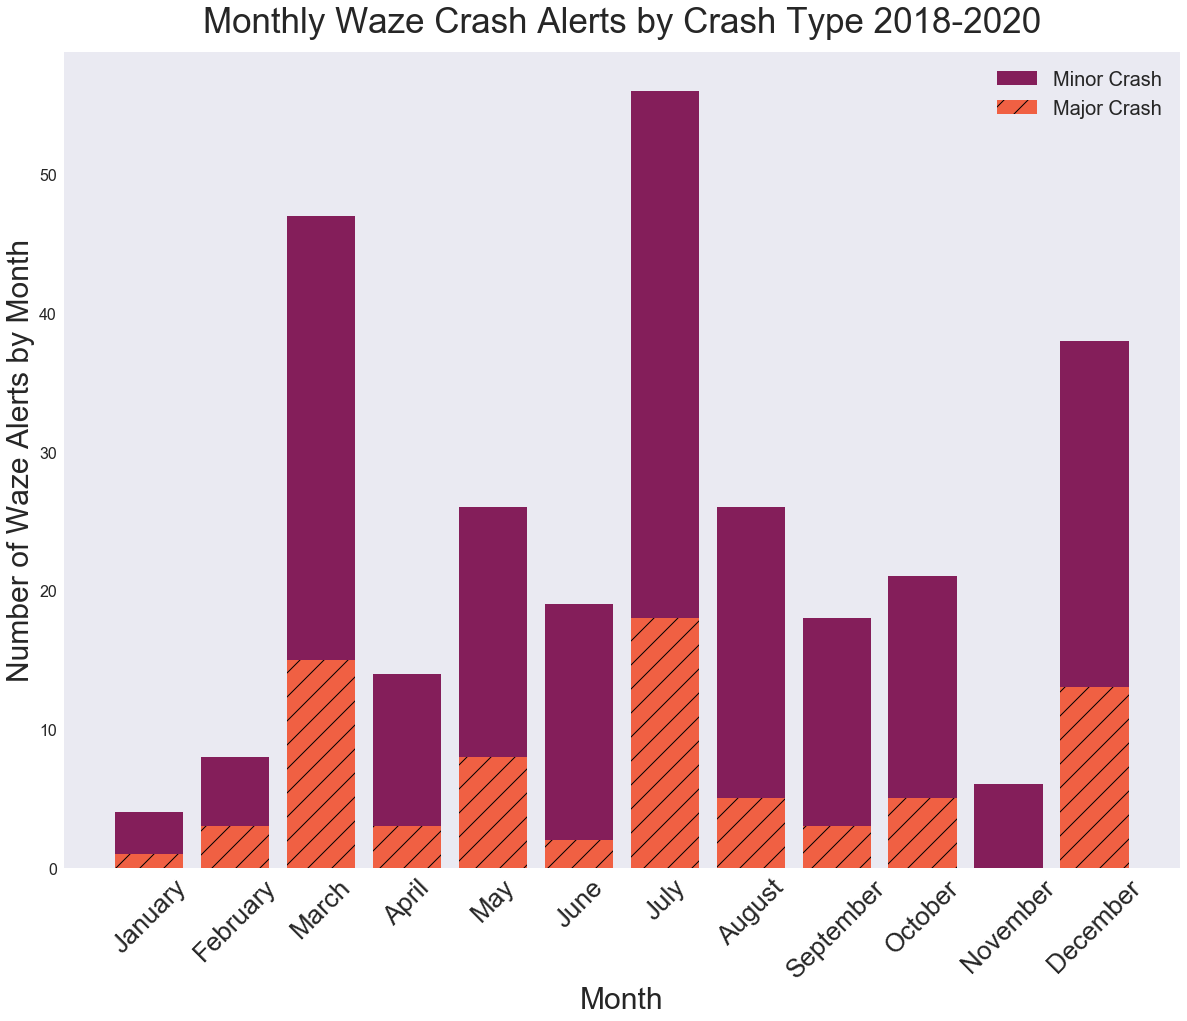

In [44]:
plt.style.use('seaborn')
import seaborn as sns
sns.set_palette("rocket", 2)
fig, ax = plt.subplots(1,1,figsize=(20,15))

ax.bar(months,
       month_df_alerts['Major Crash']+month_df_alerts['Minor Crash'], 
       label = 'Minor Crash', linewidth=4)

ax.bar(months,
       month_df_alerts['Major Crash'], 
       hatch = "/", label = 'Major Crash', linewidth=4)

ax.set_title('Monthly Waze Crash Alerts by Crash Type 2018-2020',fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Month',fontsize = 30) #xlabel
ax.set_ylabel('Number of Waze Alerts by Month', fontsize = 30)#ylabel
ax.tick_params(axis='x', which='major', labelsize=26, rotation = 45)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
plt.legend(fontsize = 20)
plt.show()

In [11]:
df['ones']=1

In [54]:
df_noroadclosed = df.loc[df['Alert']!="ROAD_CLOSED"]
df_noroadclosed = df_noroadclosed.loc[df_noroadclosed['Lat'].isna()==False]
df_noroadclosed = df_noroadclosed.loc[df_noroadclosed['Lon'].isna()==False]
#df_noroadclosed['Lat'] = df_noroadclosed['Lat'].fillna(0)
#df_noroadclosed['Lon'] = df_noroadclosed['Lon'].fillna(0)

In [48]:
df_noroadclosed.head()

,Unnamed: 0,NAME,UNIT_TYPE,Time,Alert,Sub_Alert,Street,State,Lon,Lat,Type,ones,date,month_year,month_day,year,month,hour
0,1,BRCA,National Park,2017-03-08 19:51:32,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-12,UT,-112.130970,37.683406,in-park,1,03/08/17,2017-03,03-08,2017,March,11AM
1,2,BRCA,National Park,2017-03-12 02:53:04,WEATHERHAZARD,HAZARD_ON_ROAD_CONSTRUCTION,SR-12,UT,-112.130618,37.683240,in-park,1,03/12/17,2017-03,03-12,2017,March,06PM
2,3,BRCA,National Park,2017-03-08 22:06:55,JAM,JAM_MODERATE_TRAFFIC,SR-12,UT,-112.131072,37.683454,in-park,1,03/08/17,2017-03,03-08,2017,March,02PM
3,4,BRCA,National Park,2017-03-10 02:23:50,WEATHERHAZARD,NaN,SR-12,UT,-112.138126,37.686660,in-park,1,03/10/17,2017-03,03-10,2017,March,06PM
4,5,BRCA,National Park,2017-03-23 16:06:09,JAM,JAM_MODERATE_TRAFFIC,SR-12,UT,-112.131026,37.683432,in-park,1,03/23/17,2017-03,03-23,2017,March,08AM


In [52]:
df_noroadclosed.shape

(2220029, 18)

In [55]:
#referenced blog: http://qingkaikong.blogspot.com/2016/06/using-folium-3-heatmap.html

from folium import plugins
import folium

m = folium.Map(zoom_start = 10, location=[46.8, -121.5],
                     tiles = 'openstreetmap')

gradient = {.3: 'blue', .4: 'lime', 1: 'red'}

# I am using the magnitude as the weight for the heatmap
m.add_children(plugins.HeatMap(zip(df_noroadclosed.Lat, df_noroadclosed.Lon, 
                                   df_noroadclosed.ones), radius = 10,
                              gradient=gradient))
m.save("waze_no_roadclosed_heatmap.html")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  
